## Gender Classification

The following example shows how NLTK uses features for gender classification of names.

In [1]:
import nltk
nltk.download("names")
from nltk.corpus import names

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [2]:
m = names.words('male.txt')
len(m)

2943

In [3]:
f = names.words('female.txt')
len(f)

5001

### Creation of a training set and a test set

In [4]:
import random
random.seed(1234) # Set the seed to facilitate replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names, test_names = names[500:], names[:500]
print("Size of training set:", len(train_names))
print(train_names[:3])
print("Size of test set:", len(test_names))
print(test_names[:3])

Size of training set: 7444
[('Ranice', 'female'), ('Faunie', 'female'), ('Holly-Anne', 'female')]
Size of test set: 500
[('Butler', 'male'), ('Umberto', 'male'), ('Aloysius', 'male')]


In [5]:
def ratio_gender(data,gender):
    genders = [g for (n,g) in data if g == gender]
    return len(genders)/len(data)
print("Train data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(train_names, 'male'),
                                       ratio_gender(train_names, 'female')))
print("Test data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(test_names, 'male'),
                                       ratio_gender(test_names, 'female')))

Train data
Males: 0.368 Females: 0.632
Test data
Males: 0.400 Females: 0.600


### Extraction of features

In [6]:
def gender_features(word):
   return {'last_letter': word[-1]}

In [7]:
gender_features('John')

{'last_letter': 'n'}

In [8]:
gender_features('Mary')

{'last_letter': 'y'}

In [9]:
train_set = [(gender_features(n), g) for n, g in train_names]
test_set = [(gender_features(n), g) for n, g in test_names]

### Training a classifier

In [10]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

### Testing the classifier

In [11]:
classifier.classify(gender_features('Neo'))

'male'

In [12]:
classifier.classify(gender_features('Trinity'))

'female'

In [13]:
nltk.classify.accuracy(classifier, test_set)

0.776

### Error analysis

In [14]:
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]
train_set = [(gender_features(n), g) for n, g in train_names]
devtest_set = [(gender_features(n), g) for n, g in devtest_names]
test_set = [(gender_features(n),g) for n, g in test_names]
print("Accuracy of dev-test set:", nltk.classify.accuracy(classifier, devtest_set))
errors = []
for name, tag in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))
print("Number of errors:", len(errors))

Accuracy of dev-test set: 0.752
Number of errors: 248


In [15]:
for (tag,guess,name) in sorted(errors)[:5]:
    print("correct=%-8s guess=%-8s name=%-30s" % (tag, guess, name))

correct=female   guess=male     name=Adrien                        
correct=female   guess=male     name=Aigneis                       
correct=female   guess=male     name=Aileen                        
correct=female   guess=male     name=Alisun                        
correct=female   guess=male     name=Alys                          


## A revised gender classifier

In [16]:
def gender_features2(word):
       return {'suffix1': word[-1:],
               'suffix2': word[-2:]}
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2, devtest_set2)

0.77

## Overfitting

In [17]:
def gender_features3(name):
      features = {}
      features['firstletter'] = name[0].lower()
      features['lastletter'] = name[-1]
      for letter in 'abcdefghijklmnopqrstuvwxyz':
         features['count(%s)' % letter] = name.lower().count(letter)
         features['has(%s)' % letter] = (letter in name.lower())
      return features

gender_features3('John')

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 1,
 'count(i)': 0,
 'count(j)': 1,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 0,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 0,
 'count(z)': 0,
 'firstletter': 'j',
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': True,
 'has(i)': False,
 'has(j)': True,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False,
 'lastletter': 'n'}

In [18]:
train_set3 = [(gender_features3(n), g) for n, g in train_names]
devtest_set3 = [(gender_features3(n), g) for n, g in devtest_names]
classifier3 = nltk.NaiveBayesClassifier.train(train_set3[:50]) # small training set
nltk.classify.accuracy(classifier3, devtest_set3)

0.698

In [19]:
classifier2b = nltk.NaiveBayesClassifier.train(train_set2[:50]) # small training set
nltk.classify.accuracy(classifier2b, devtest_set2)

0.7

In [20]:
nltk.classify.accuracy(classifier3, train_set3[:50])

0.88

In [21]:
nltk.classify.accuracy(classifier2b, devtest_set2[:50])

0.72

In [22]:
train_accuracy2 = []
devtest_accuracy2 = []
train_accuracy3 = []
devtest_accuracy3 = []
nsamples = range(10, 100, 10)
for n in nsamples:
    classifier2c = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2c, train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2c, devtest_set2))
    classifier3c = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy3.append(nltk.classify.accuracy(classifier3c, train_set3[:n]))
    devtest_accuracy3.append(nltk.classify.accuracy(classifier3c, devtest_set3))

### This plot shows that there is no overfitting

In this plot there is not much difference between the evaluation of the training set and the test set, except for a very small training size.

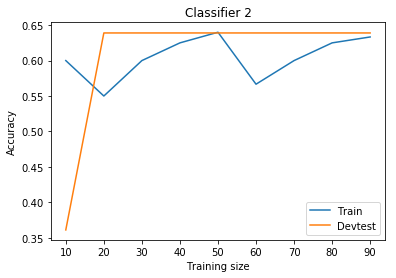

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

### This plot shows that there is overfitting

We can observe overfitting when the evaluation on the training set is much better than that on the test set. Overfitting is generally lesser as we increase the size of the training set.

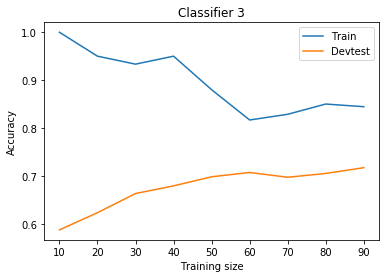

In [24]:
plt.plot(nsamples,train_accuracy3, label='Train')
plt.plot(nsamples,devtest_accuracy3, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()

In [25]:
classifier.show_most_informative_features()

Most Informative Features
             last_letter = 'k'              male : female =     46.2 : 1.0
             last_letter = 'a'            female : male   =     36.6 : 1.0
             last_letter = 'f'              male : female =     15.4 : 1.0
             last_letter = 'p'              male : female =      9.9 : 1.0
             last_letter = 'v'              male : female =      9.9 : 1.0
             last_letter = 'd'              male : female =      9.6 : 1.0
             last_letter = 'm'              male : female =      9.1 : 1.0
             last_letter = 'o'              male : female =      8.8 : 1.0
             last_letter = 'r'              male : female =      6.6 : 1.0
             last_letter = 'w'              male : female =      5.1 : 1.0


In [26]:
classifier2.show_most_informative_features()

Most Informative Features
                 suffix2 = 'na'           female : male   =    147.8 : 1.0
                 suffix2 = 'la'           female : male   =     65.8 : 1.0
                 suffix1 = 'k'              male : female =     63.0 : 1.0
                 suffix2 = 'rt'             male : female =     43.9 : 1.0
                 suffix2 = 'ta'           female : male   =     40.0 : 1.0
                 suffix2 = 'rd'             male : female =     37.7 : 1.0
                 suffix2 = 'us'             male : female =     36.3 : 1.0
                 suffix1 = 'a'            female : male   =     36.3 : 1.0
                 suffix2 = 'ld'             male : female =     33.9 : 1.0
                 suffix2 = 'ia'           female : male   =     33.8 : 1.0


## Gender classifier in Scikit-learn

In [27]:
from sklearn.naive_bayes import MultinomialNB
def gender_features(word):
    "Return the ASCII value of the last two characters"
    return [ord(word[-2]), ord(word[-1])]
train_set = [(gender_features(n), g) for n, g in train_names]
devtest_set = [(gender_features(n), g) for n, g in devtest_names]
test_set = [(gender_features(n), g) for n, g in test_names]
train_X,train_y = zip(*train_set)
classifier = MultinomialNB()
classifier.fit(train_X, train_y)
devtest_X,devtest_y = zip(*test_set)
classifier.predict(devtest_X[:5])

array(['female', 'female', 'female', 'female', 'female'], 
      dtype='<U6')

In [28]:
from sklearn.metrics import accuracy_score
devtest_predictions = classifier.predict(devtest_X)
accuracy_score(devtest_y, devtest_predictions)

0.61399999999999999

# Impact of K in KNN

In [29]:
import numpy as np
random.seed(1234) # It is useful to set the seed to allow replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]

In [30]:
def gender_features_knn(word):
    "Return a list with the ASCII of the last 10 characters"
    features = np.zeros(10)
    for i in range(min(len(word), 10)):
        features[-i] = ord(word[-i])
    return features

In [31]:
train_set_knn=[(gender_features_knn(n), g) for n, g in train_names]
devtest_set_knn=[(gender_features_knn(n), g) for n, g in devtest_names]
train_X, train_y = zip(*train_set_knn)
devtest_X, devtest_y = zip(*devtest_set_knn)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
train_accuracy = []
devtest_accuracy = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X, train_y)
    devtest_predictions = knn_classifier.predict(devtest_X)
    devtest_accuracy.append(accuracy_score(devtest_y, devtest_predictions))
    train_predictions = knn_classifier.predict(train_X)
    train_accuracy.append(accuracy_score(train_y, train_predictions))

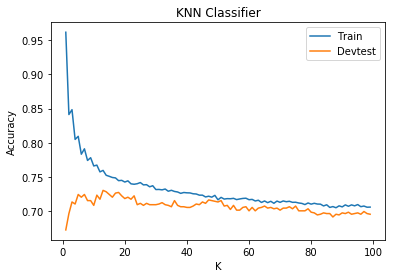

In [33]:
plt.plot(range(1,100),train_accuracy,label='Train')
plt.plot(range(1,100),devtest_accuracy,label='Devtest')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier')
plt.legend()

# Impact of Features in KNN

In [34]:
def gender_features2_knn(word, limit=10):
    "Return a list with the ASCII of the last 'limit' characters"
    features = np.zeros(10)
    for i in range(min(len(word), limit)):
        features[-i] = ord(word[-i])
    return features

In [35]:
train_accuracy2 = []
devtest_accuracy2 = []
for limit in range(1, 10):
    train_set2_knn=[(gender_features2_knn(n, limit), g) for n, g in train_names]
    devtest_set2_knn=[(gender_features2_knn(n, limit), g) for n, g in devtest_names]
    train2_X, train2_y = zip(*train_set2_knn)
    devtest2_X, devtest2_y = zip(*devtest_set2_knn)
    knn_classifier = KNeighborsClassifier(n_neighbors=15)
    knn_classifier.fit(train2_X, train2_y)
    devtest_predictions = knn_classifier.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))
    train_predictions = knn_classifier.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y, train_predictions))

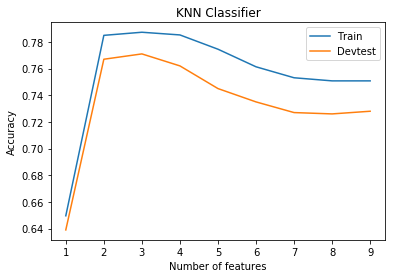

In [36]:
plt.plot(range(1,10), train_accuracy2, label='Train')
plt.plot(range(1,10), devtest_accuracy2, label='Devtest')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('KNN Classifier')
plt.legend()

# Impact of Features in Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
train_accuracy2 = []
devtest_accuracy2 = []
for limit in range(1,10):
    train_set2_knn=[(gender_features2_knn(n, limit), g) for n, g in train_names]
    devtest_set2_knn=[(gender_features2_knn(n, limit), g) for n, g in devtest_names]
    train2_X, train2_y = zip(*train_set2_knn)
    devtest2_X, devtest2_y = zip(*devtest_set2_knn)
    nb_classifier = MultinomialNB()
    nb_classifier.fit(train2_X, train2_y)
    devtest_predictions = nb_classifier.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))
    train_predictions = nb_classifier.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y, train_predictions))

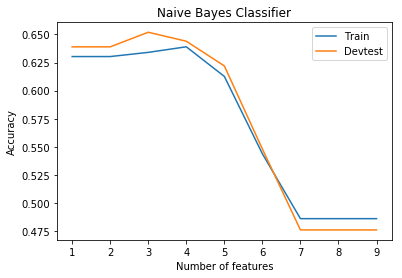

In [38]:
plt.plot(range(1, 10), train_accuracy2, label='Train')
plt.plot(range(1, 10), devtest_accuracy2, label='Devtest')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier')
plt.legend()

# Impact of Features in Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
train_accuracy2 = []
devtest_accuracy2 = []
for limit in range(1,10):
    train_set2_knn=[(gender_features2_knn(n, limit), g) for n, g in train_names]
    devtest_set2_knn=[(gender_features2_knn(n, limit), g) for n, g in devtest_names]
    train2_X, train2_y = zip(*train_set2_knn)
    devtest2_X, devtest2_y = zip(*devtest_set2_knn)
    lr_classifier = LogisticRegression()
    lr_classifier.fit(train2_X, train2_y)
    devtest_predictions = lr_classifier.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))
    train_predictions = lr_classifier.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y, train_predictions))

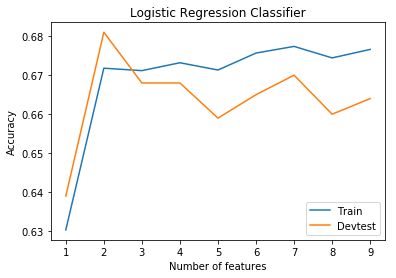

In [40]:
plt.plot(range(1,10), train_accuracy2, label='Train')
plt.plot(range(1,10), devtest_accuracy2, label='Devtest')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier')
plt.legend()